## Train an Supervised XGBoost model using the data stored in feature store

In [1]:
#importing all the required libraries and initialising the boto session and the feature store session 
import boto3
import sagemaker
from sagemaker.session import Session


region = boto3.Session().region_name

boto_session = boto3.Session(region_name=region)

sagemaker_client = boto_session.client(service_name='sagemaker', region_name=region)
featurestore_runtime = boto_session.client(service_name='sagemaker-featurestore-runtime', region_name=region)

feature_store_session = Session(
    boto_session=boto_session,
    sagemaker_client=sagemaker_client,
    sagemaker_featurestore_runtime_client=featurestore_runtime
)

#### We will use the feature group created earlier

In [2]:
%store -r

In [3]:
# importing the sagemaker feature group module to ingest data from feature store
from sagemaker.feature_store.feature_group import FeatureGroup

fd_feature_group_name = 'transactionfeaturegroup'

fd_feature_group = FeatureGroup(name=fd_feature_group_name, sagemaker_session=feature_store_session)

## Creating Training Dataset using feature group

We will be using both identity and transaction feature groups.
Running athena job to join the data stored in S3 from 2 from feature group
 

In [4]:
# initialising a default bucket
default_s3_bucket_name = feature_store_session.default_bucket()
prefix = 'sagemaker-featurestore'

print(default_s3_bucket_name)

sagemaker-ap-south-1-080451317723


In [5]:
# running athena query on the feature store stored in S3 bucket
transaction_query = fd_feature_group.athena_query()

#storeing the table name variable
transaction_table = transaction_query.table_name

print(transaction_table)


# query to be run 
query_string = 'SELECT * FROM "'+transaction_table+'"'
print('Running ' + query_string)

# running the query and storing the pandas dataframe created to S3 bucket in query results sub folder
transaction_query.run(query_string=query_string, output_location='s3://'+default_s3_bucket_name+'/'+prefix+'/query_results/')
transaction_query.wait()
dataset = transaction_query.as_dataframe()

dataset

transactionfeaturegroup-1639487824
Running SELECT * FROM "transactionfeaturegroup-1639487824"


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v26,v27,v28,amount,class,event_time,record_id,write_time,api_invocation_time,is_deleted
0,154562.0,1.434671,-1.291996,-1.132534,0.431622,-0.435673,0.656909,-0.652167,0.276189,1.161493,...,0.345469,-0.055816,0.026946,295.30,0,1.639488e+09,249755,2021-12-14 13:28:50.251,2021-12-14 13:22:51.000,False
1,156172.0,1.853259,-0.140104,-2.066584,1.151793,0.530221,-0.920152,0.693785,-0.254771,-0.094436,...,-0.481879,-0.064670,-0.064917,101.50,0,1.639488e+09,253273,2021-12-14 13:28:50.251,2021-12-14 13:22:51.000,False
2,95534.0,1.998042,-0.150028,-0.564531,1.057674,-0.212438,-0.375196,-0.242937,-0.171510,2.468904,...,0.001702,-0.059418,-0.054060,0.01,0,1.639488e+09,151437,2021-12-14 13:28:50.251,2021-12-14 13:22:51.000,False
3,139023.0,1.709209,0.921867,-2.349246,4.263352,1.164863,-0.712155,0.730886,-0.102934,-1.354044,...,-0.002726,-0.049081,0.011048,91.01,0,1.639488e+09,212867,2021-12-14 13:28:50.251,2021-12-14 13:22:51.000,False
4,10369.0,1.111065,0.545980,0.750707,2.450146,0.191360,0.481849,-0.197253,0.166455,0.417873,...,-0.270529,-0.027408,0.005097,10.25,0,1.639488e+09,7551,2021-12-14 13:28:50.251,2021-12-14 13:22:52.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,157776.0,-0.483629,0.862919,0.241969,-0.785442,0.427982,-0.787577,1.068080,-0.206279,0.351421,...,0.109604,0.318189,-0.022686,21.99,0,1.639488e+09,256612,2021-12-14 13:23:02.559,2021-12-14 13:22:51.000,False
99996,106391.0,-0.605921,0.938154,2.359743,-0.142475,0.115729,-0.222119,0.588859,-0.320029,1.516950,...,-0.738756,-0.199762,-0.152970,11.27,0,1.639488e+09,155792,2021-12-14 13:23:02.559,2021-12-14 13:22:51.000,False
99997,84210.0,-0.492857,0.923590,1.649824,-0.085427,-0.173034,-0.702497,0.580665,0.100432,-0.580246,...,0.042887,0.254814,0.112425,9.99,0,1.639488e+09,141272,2021-12-14 13:23:02.559,2021-12-14 13:22:51.000,False
99998,134419.0,0.060522,0.787730,-0.146108,-0.964349,1.035412,-0.071046,0.920963,0.013015,-0.286318,...,0.192135,0.245111,0.076804,9.99,0,1.639488e+09,202623,2021-12-14 13:23:02.559,2021-12-14 13:22:51.000,False


In [6]:
# Selecting the columns to be used from the data frame
dataset = dataset[['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class']]


In [7]:
# dropping all the NANs 
dataset = dataset.dropna()
dataset.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,154562.0,1.434671,-1.291996,-1.132534,0.431622,-0.435673,0.656909,-0.652167,0.276189,1.161493,...,0.135988,-0.182828,-0.037648,-0.229441,-0.588768,0.345469,-0.055816,0.026946,295.30,0
1,156172.0,1.853259,-0.140104,-2.066584,1.151793,0.530221,-0.920152,0.693785,-0.254771,-0.094436,...,0.192666,0.326074,-0.120927,-0.446195,0.367994,-0.481879,-0.064670,-0.064917,101.50,0
2,95534.0,1.998042,-0.150028,-0.564531,1.057674,-0.212438,-0.375196,-0.242937,-0.171510,2.468904,...,-0.508941,-0.841443,0.373076,1.107912,-0.183633,0.001702,-0.059418,-0.054060,0.01,0
3,139023.0,1.709209,0.921867,-2.349246,4.263352,1.164863,-0.712155,0.730886,-0.102934,-1.354044,...,-0.092148,-0.422369,-0.008842,-0.300789,0.093130,-0.002726,-0.049081,0.011048,91.01,0
4,10369.0,1.111065,0.545980,0.750707,2.450146,0.191360,0.481849,-0.197253,0.166455,0.417873,...,-0.346103,-0.880483,0.136438,-0.435264,0.138783,-0.270529,-0.027408,0.005097,10.25,0


Class column represents the transaction being fraudulent or not. 
The data set is highly imbalanced as is the case with most transaction based datasets.


In [8]:
#Calculating the number of cases in both categories
nonfrauds, frauds = dataset.groupby('class').size()
print('Number of frauds: ', frauds)
print('Number of non-frauds: ', nonfrauds)
print('Percentage of fradulent data:', 100.*frauds/(frauds + nonfrauds))

Number of frauds:  172
Number of non-frauds:  99828
Percentage of fradulent data: 0.172


In [9]:
# selecting the feature columns without class column
feature_columns = dataset.columns[:-1]
# selecting the label column
label_column = dataset.columns[-1]

#extracting the values in the feature columns
features = dataset[feature_columns].values.astype('float32')

#extracting the values in the labels column
labels = (dataset[label_column].values).astype('float32')

In [10]:
#Importing the sklearn module 
# importing the train test split to divide the data into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.1, random_state=42)

### Preparing the datasets and uploading the created test and train datasets onto S3

In [11]:
#importing the required libraries 
import io
import sklearn
import os
from sklearn.datasets import dump_svmlight_file   

#Using the BytesIO because the data stored in S3 is an object
# creating a buffer for Bytes IO
buf = io.BytesIO()

# dumping the files as object to the buffer
sklearn.datasets.dump_svmlight_file(X_train, y_train, buf)
buf.seek(0);


In [12]:
# initialising the directory in the S3 to store the data
key = 'fraud-dataset'
subdir = 'base'
boto3.resource('s3', region_name=region).Bucket(default_s3_bucket_name).Object(os.path.join(prefix, 'train', subdir, key)).upload_fileobj(buf)

# directory for storing the training data
s3_train_data = 's3://{}/{}/train/{}/{}'.format(default_s3_bucket_name, prefix, subdir, key)
print('Uploaded training data location: {}'.format(s3_train_data))

# directory for storing the output artifacts
output_location = 's3://{}/{}/output'.format(default_s3_bucket_name, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Uploaded training data location: s3://sagemaker-ap-south-1-080451317723/sagemaker-featurestore/train/base/fraud-dataset
Training artifacts will be uploaded to: s3://sagemaker-ap-south-1-080451317723/sagemaker-featurestore/output


---
## Training

Importing the XGBoost containers URI from sagemaker



In [13]:
#importing the xgboost image URI
import sagemaker
container = sagemaker.image_uris.retrieve("xgboost", region, "latest")

Creating an estimator for training. 


In [14]:
# fetching the IAM role
sagemaker_iam_role = sagemaker.get_execution_role()

# creating a sagemaker session
session = sagemaker.Session()


In [15]:
# Creating an estimator with all the parameters (xgb container,
#                                                role,
#                                                instance count,
#                                                instance type,
#                                                output path,
#                                                the sage maker session)
xgb = sagemaker.estimator.Estimator(container,
                                    role=sagemaker_iam_role, 
                                    instance_count=1, 
                                    instance_type='ml.m4.xlarge',
                                    output_path=output_location,
                                    sagemaker_session=session)
# setting up the hyper para meters for the xgboost 
xgb.set_hyperparameters(max_depth=5,
                        eval_metric='auc',
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        num_round=100)

In [16]:
# fitting the training data over our xgb estimator
xgb.fit({'train': s3_train_data}) 

2021-12-14 14:51:37 Starting - Starting the training job...
2021-12-14 14:51:39 Starting - Launching requested ML instancesProfilerReport-1639493497: InProgress
...
2021-12-14 14:52:34 Starting - Preparing the instances for training............
2021-12-14 14:54:30 Downloading - Downloading input data
2021-12-14 14:54:30 Training - Downloading the training image..Arguments: train
[2021-12-14:14:54:44:INFO] Running standalone xgboost training.
[2021-12-14:14:54:44:INFO] Path /opt/ml/input/data/validation does not exist!
[2021-12-14:14:54:44:INFO] File size need to be processed in the node: 55.3mb. Available memory size in the node: 8370.02mb
[14:54:44] S3DistributionType set as FullyReplicated
[14:54:45] 90000x30 matrix with 2699427 entries loaded from /opt/ml/input/data/train
[14:54:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[0]#011train-auc:0.8967
[14:54:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nod

### deploying XGBoost Model


In [17]:
from sagemaker.predictor import CSVDeserializer,CSVSerializer

# deploying the model created after training on endpoint

predictor = xgb.deploy(initial_instance_count=1,
                       model_name="{}-xgb".format("fraud-detection"),
                       endpoint_name="{}-xgb".format("fraud-detection"),
                       instance_type="ml.c5.xlarge",
                       serializer=CSVSerializer(),
                       deserializer=None)

---!

### Evaluating the model


In [18]:

import numpy as np

# created small batches for prediction since the dataset is too large.
def predict(current_predictor, data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, current_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

In [19]:
raw_preds = predict(predictor, X_test)

In [20]:
# Using cohen kappa score and balanced accuracy score  
# because they take into account the frequency of occurences in imbalaced datasets.
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score

# Putting in threshold for testing
y_preds = np.where(raw_preds > 0.5, 1, 0)
print("Balanced accuracy = {}".format(balanced_accuracy_score(y_test, y_preds)))
print("Cohen's Kappa = {}".format(cohen_kappa_score(y_test, y_preds)))

Balanced accuracy = 1.0
Cohen's Kappa = 1.0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# plotting the confusion matrix to understand the model's performance per class.
def plot_confusion_matrix(y_true, y_predicted):

    cm  = confusion_matrix(y_true, y_predicted)
    # Obtaining the per-class normalized value for each sample point
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # coloring each cell as per their heat value
    ax = sns.heatmap(cm_norm, annot=cm, fmt="d")
    ax.set(xticklabels=["non-fraud", "fraud"], yticklabels=["non-fraud", "fraud"])
    ax.set_ylim([0,2])
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()

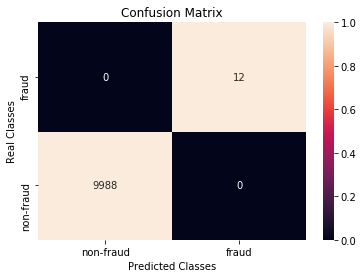

In [22]:
plot_confusion_matrix(y_test, y_preds)

In [23]:
from sklearn.metrics import classification_report
# creating a classification report
print(classification_report(
    y_test, y_preds, target_names=['non-fraud', 'fraud']))

              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00      9988
       fraud       1.00      1.00      1.00        12

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### SMOTE

Our model performed very good on the dataset we provided. Since the data is highly imbalanced , trying few other techniques for better model.  

In [24]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1


/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached imbalanced_learn-0.6.0-py3-none-any.whl (162 kB)
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [25]:
# Importing the Smote ( synthetic minority over sampling )
from imblearn.over_sampling import SMOTE

# initialising the smote module with random state of 42
smote = SMOTE(random_state=42)

#creating new dataset with smote applied
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [26]:
from collections import Counter
# this will count the number of data point in each cateogry
print(sorted(Counter(y_smote).items()))

[(0.0, 89840), (1.0, 89840)]


We now have equal number of cases for both the classes.


Using the smote dataset just created and upload it to S3 for training.

In [27]:
smote_buf = io.BytesIO()

# Dumping the smote data into a buffer
sklearn.datasets.dump_svmlight_file(X_smote, y_smote, smote_buf)
smote_buf.seek(0);

# Uploading from buffer to s3
key = 'fraud-dataset-smote'
subdir = 'smote'
boto3.resource('s3', region_name=region).Bucket(default_s3_bucket_name).Object(os.path.join(prefix, 'train', subdir, key)).upload_fileobj(smote_buf)

s3_smote_train_data = 's3://{}/{}/train/{}/{}'.format(default_s3_bucket_name, prefix, subdir, key)
print('Uploaded training data location: {}'.format(s3_smote_train_data))

smote_output_location = 's3://{}/{}/smote-output'.format(default_s3_bucket_name, prefix)
print('Training artifacts will be uploaded to: {}'.format(smote_output_location))

Uploaded training data location: s3://sagemaker-ap-south-1-080451317723/sagemaker-featurestore/train/smote/fraud-dataset-smote
Training artifacts will be uploaded to: s3://sagemaker-ap-south-1-080451317723/sagemaker-featurestore/smote-output


In [28]:
# creating smote estimator with all the parameters.
smote_xgb = sagemaker.estimator.Estimator(container,
                                    role=sagemaker_iam_role, 
                                    instance_count=1, 
                                    instance_type='ml.m4.xlarge',
                                    output_path=output_location,
                                    sagemaker_session=session)
#setting up the hyper parameters
smote_xgb.set_hyperparameters(max_depth=5,
                        eval_metric='auc',
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        num_round=100)

In [29]:
# fitting the data 
smote_xgb.fit({'train': s3_smote_train_data})

2021-12-14 14:57:16 Starting - Starting the training job...
2021-12-14 14:57:42 Starting - Launching requested ML instancesProfilerReport-1639493836: InProgress
...
2021-12-14 14:58:12 Starting - Preparing the instances for training.........
2021-12-14 14:59:43 Downloading - Downloading input data...
2021-12-14 15:00:18 Training - Training image download completed. Training in progress..Arguments: train
[2021-12-14:15:00:19:INFO] Running standalone xgboost training.
[2021-12-14:15:00:19:INFO] Path /opt/ml/input/data/validation does not exist!
[2021-12-14:15:00:19:INFO] File size need to be processed in the node: 110.3mb. Available memory size in the node: 8360.18mb
[15:00:19] S3DistributionType set as FullyReplicated
[15:00:19] 179680x30 matrix with 5389380 entries loaded from /opt/ml/input/data/train
[15:00:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[0]#011train-auc:0.988866
[15:00:20] src/tree/updater_prune.cc:74: tree pru

In [30]:
# prediting the outputs 
from sagemaker.predictor import CSVDeserializer,CSVSerializer

predictor = smote_xgb.deploy(initial_instance_count=1,
                       model_name="{}-xgb".format("fraud-detection-smote"),
                       endpoint_name="{}-xgb".format("fraud-detection-smote"),
                       instance_type="ml.c5.xlarge",
                       serializer=CSVSerializer(),
                       deserializer=None)

----!

In [31]:
# checking the predictions
smote_raw_preds = predict(predictor, X_test)
# setting up a threshold
smote_preds = np.where(smote_raw_preds > 0.5, 1, 0)

In [32]:
print("Balanced accuracy = {}".format(balanced_accuracy_score(y_test, smote_preds)))
print("Cohen's Kappa = {}".format(cohen_kappa_score(y_test, smote_preds)))

Balanced accuracy = 0.9999499399279135
Cohen's Kappa = 0.9599500176219923


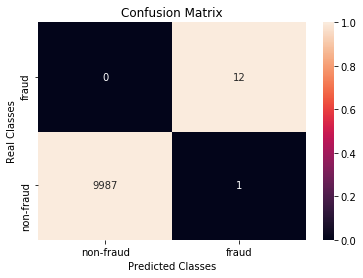

In [33]:
plot_confusion_matrix(y_test, smote_preds)

In [34]:
# generating the classification report for the smote dataset
print(classification_report(
    y_test, smote_preds, target_names=['non-fraud', 'fraud']))

              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00      9988
       fraud       0.92      1.00      0.96        12

    accuracy                           1.00     10000
   macro avg       0.96      1.00      0.98     10000
weighted avg       1.00      1.00      1.00     10000



Changing the threshold value

In [35]:
# trying for various thresholds for best results
for thres in np.linspace(0.1, 0.9, num=9):
    smote_thres_preds = np.where(smote_raw_preds > thres, 1, 0)
    print("Threshold: {:.1f}".format(thres))
    print("Balanced accuracy = {:.3f}".format(balanced_accuracy_score(y_test, smote_thres_preds)))
    print("Cohen's Kappa = {:.3f}\n".format(cohen_kappa_score(y_test, smote_thres_preds)))

Threshold: 0.1
Balanced accuracy = 0.999
Cohen's Kappa = 0.666

Threshold: 0.2
Balanced accuracy = 1.000
Cohen's Kappa = 0.774

Threshold: 0.3
Balanced accuracy = 1.000
Cohen's Kappa = 0.827

Threshold: 0.4
Balanced accuracy = 1.000
Cohen's Kappa = 0.857

Threshold: 0.5
Balanced accuracy = 1.000
Cohen's Kappa = 0.960

Threshold: 0.6
Balanced accuracy = 1.000
Cohen's Kappa = 0.960

Threshold: 0.7
Balanced accuracy = 1.000
Cohen's Kappa = 1.000

Threshold: 0.8
Balanced accuracy = 1.000
Cohen's Kappa = 1.000

Threshold: 0.9
Balanced accuracy = 1.000
Cohen's Kappa = 1.000



### Observation:

The cohen's kappa increases with the threshold values without loss in balances accuracy. 

### Inference:

We can keep low threshold if " not missing fraudulent cases" is our priority 

or 

we can keep high threshold to minimise the number of false positives.